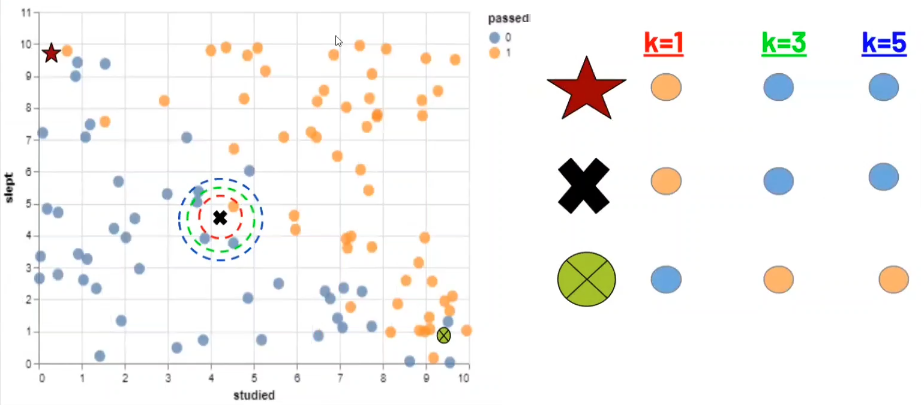

- Eğer "K" değeri çok büyükse, model veri setinin genel yapısını fazla genelleştirir ve aşırı basitleştirme (underfitting) meydana gelebilir. Bu, modelin karmaşıklığının azalması ve bireysel veri noktalarının özelliklerinin göz ardı edilmesi anlamına gelir.

- Öte yandan, "K" değeri çok küçükse (örneğin 1), model veri üzerinde aşırı uyuma (overfitting) eğiliminde olur, yani gürültülü verilere veya aykırı değerlere fazla duyarlı hale gelir.

- Small k can lead to overfitting, as the model captures too much of the noise in the training data. Large k can lead to underfitting, as the model is too simple and fails to capture the underlying structure of the data.


- A suitable k can be chosen by looking at the performance on a validation set or by using cross-validation techniques.

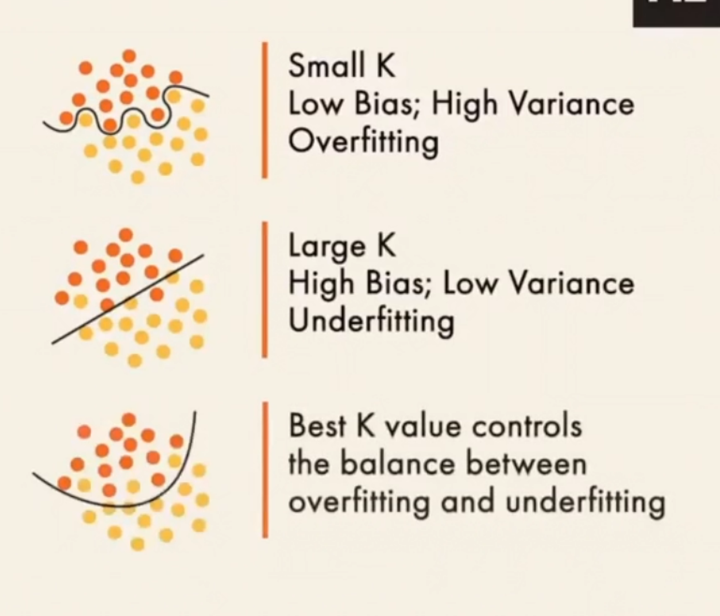

**Ayşe Hocam Sağolsun**

KNN - EN YAKIN KOMŞU
 Distance Based Algoritma Çeşidi :
 * Yani mesafeye dayalı hesaplama yapan algoritma
 * Aradaki mesafe belirleyici noktadır
 * Yeni noktanın diğer noklara olan mesafesini hesaplar. En yakın hangi sınıf ise ona dahil eder
 * Mesafeye dayalı hesaplamalarda scaled yapmak farzdır
 * KNN hesaplama yöntemleri:
 1- Öklit (en çok kullanılan)
 2- Manhattan
 * Çok kullanılmaz. En iyi scoru KNN ile aldım dersek soru işsareti ile yaklaşırlar
 * Çok güvenilir bir algoritma değildir.
 * En yakın kaç komşuya göre hesaplasın? sorusunun cevabı olan "k" yı biz belirliyoruz
 (3-5 gibi)
Dezavantajları:
 * Feature sayısı 2-3 ü geçtiği zaman mesafeyi ölçmek zorlaşıyor ve çok zaman alıyor
 * Veri setindeki gözlem (satır)sayısı büyük olduğunda her birine olan mesafeyi ölçmek çok maliyetli
Çalışma Mantığı:
 * Mesafe hesaplamalarını yapar
 * Küçükten büyüğe sort eder
 * k değerinden keser
 * Bölünen yerin üstünde kalan sınıflardan en çok hangisi varsa ona dahil eder.

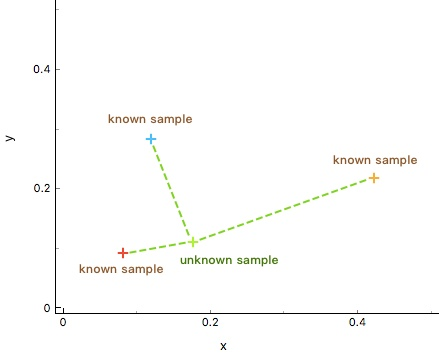

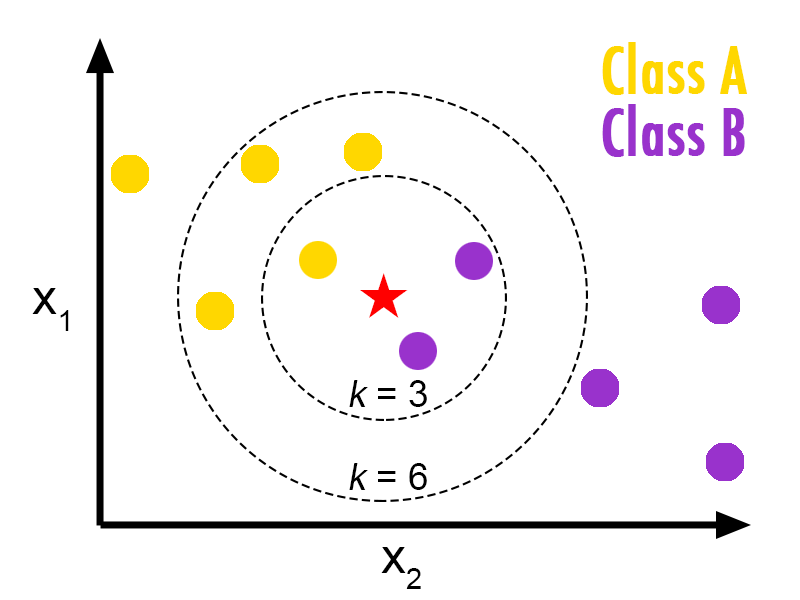

**İNCİ HOCAM KULAKLARI ÇINLASIN**

Aynı noktaya giden karınca ve sinek için; Manhattan: karıncanın yürüdüğü yol.Öklid : sineğin aldığı yol

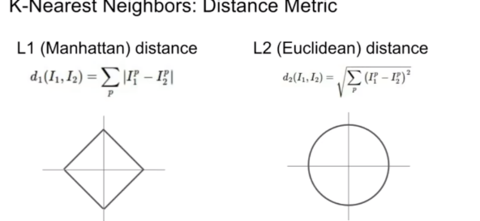

## KNN MANUAL ÖRNEK


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_data():
    """
    Veriyi oluşturan fonksiyon.
    features: değişkenler, x ve y
    labels: sınıflar (A, B)
    """
    
    features = np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    
    labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    
    return features, labels

In [3]:
features, labels = create_data()

In [4]:
print("features\n", features)

features
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]


In [5]:
print("labels\n", labels)

labels
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [6]:
features[0]

array([2.88, 3.05])

In [7]:
x_df = pd.DataFrame(features)
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


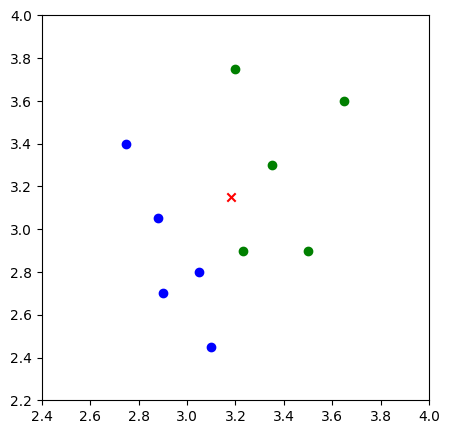

In [8]:
plt.figure(figsize=(5,5))
plt.xlim(2.4, 4)
plt.ylim(2.2, 4)

plt.scatter(x_df.iloc[:5, 0], x_df.iloc[:5,1], c = "b")
plt.scatter(x_df.iloc[5:, 0], x_df.iloc[5:,1], c = "g")

plt.scatter([3.18], [3.15], c="r", marker ="x");

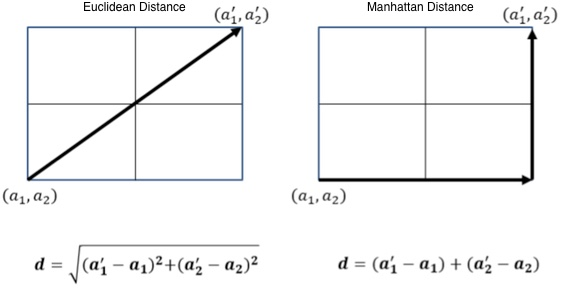

In [9]:
def manhattan(x, y):
    """ Manhattan Distance """
    d = np.sum(np.abs(x - y))
    return d

In [10]:
x = np.array([3, 5])
print("x:", x)

y = np.array([6, 9])
print("y:", y)

d_man = manhattan(x, y)
print(d_man)

x: [3 5]
y: [6 9]
7


In [11]:
def euclidean(x, y):
    """ Euclidean distanc """
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$

In [12]:
x = np.array([3, 5])
print("x:", x)

y = np.array([6, 9])
print("y:", y)

d_euc = euclidean(x, y)
print(d_euc)

x: [3 5]
y: [6 9]
5.0


## Import Library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Kanser tahmin Modeli

In [14]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [17]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

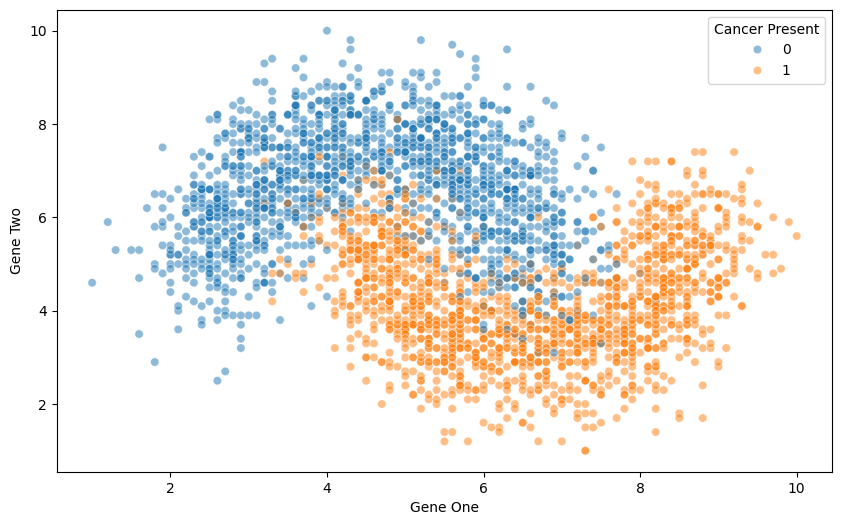

In [18]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.5);

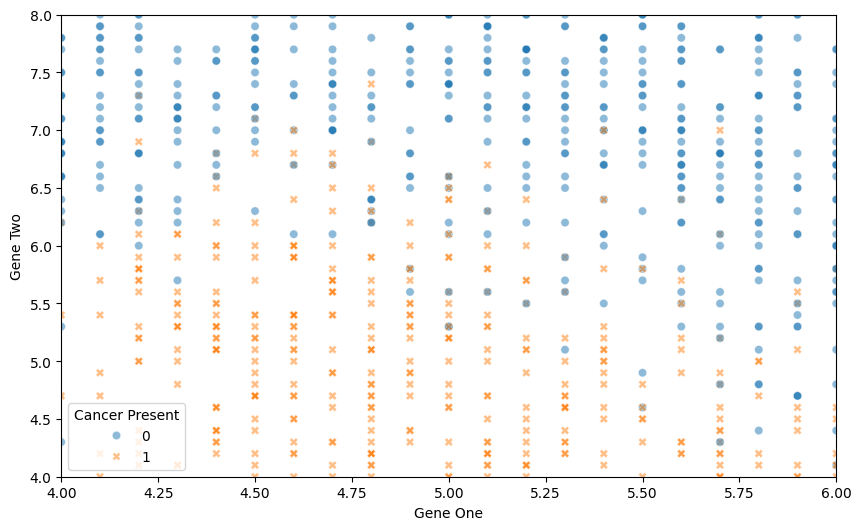

In [19]:
sns.scatterplot(x = "Gene One", y = "Gene Two", 
                hue = "Cancer Present", 
                data = df, alpha = 0.5, 
                style = "Cancer Present")
plt.xlim(4,6)
plt.ylim(4,8);

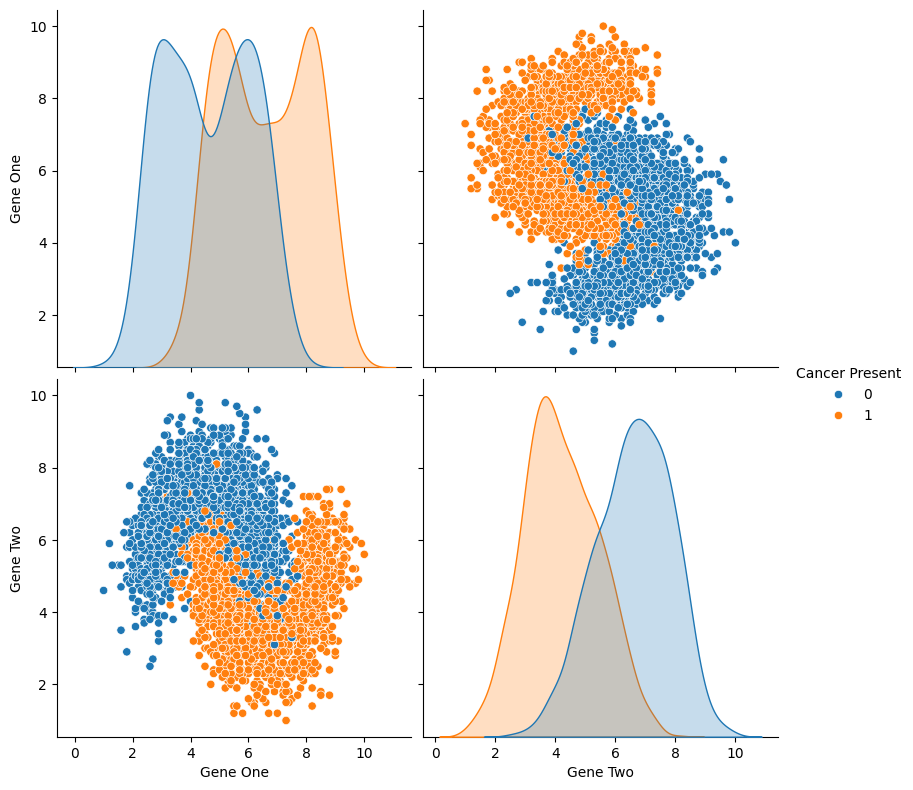

In [20]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

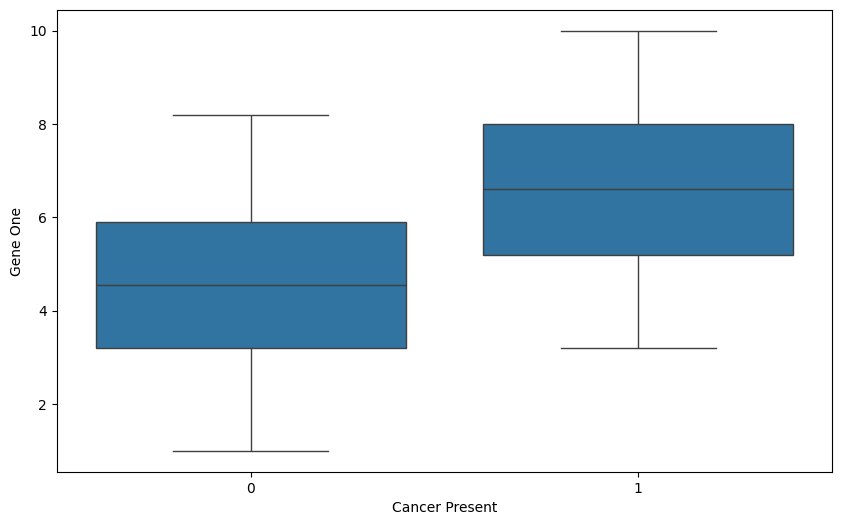

In [21]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df );

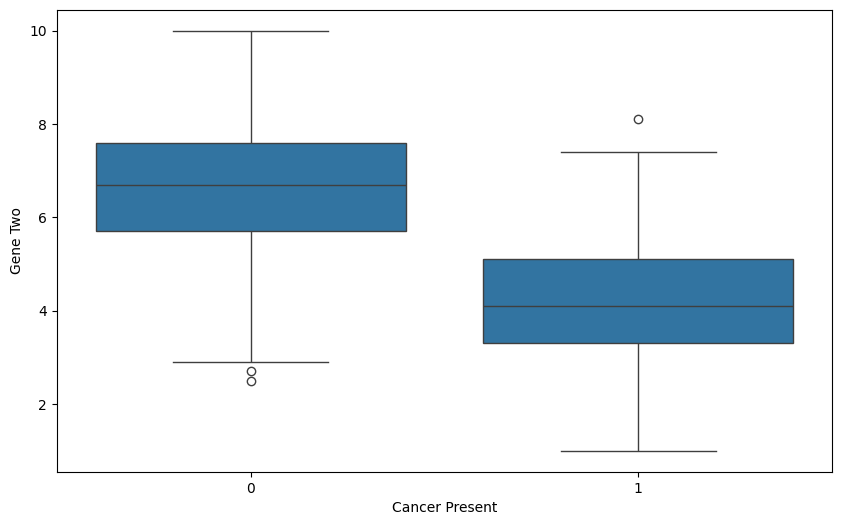

In [22]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df );

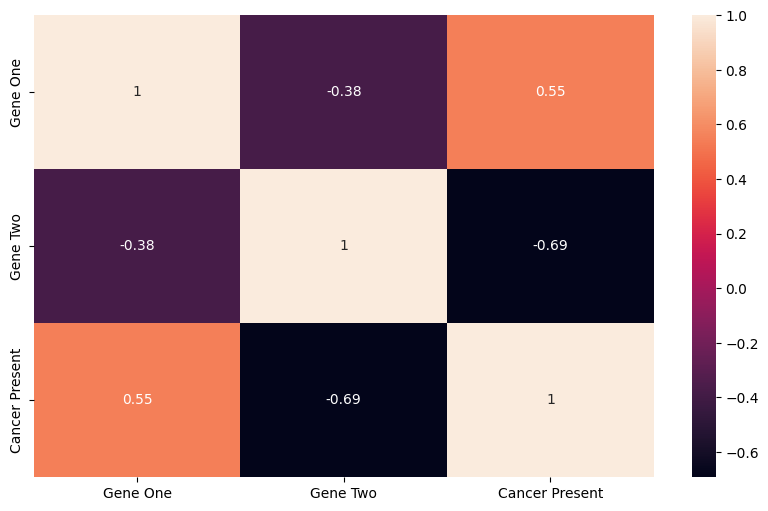

In [23]:
sns.heatmap(df.corr(), annot = True);

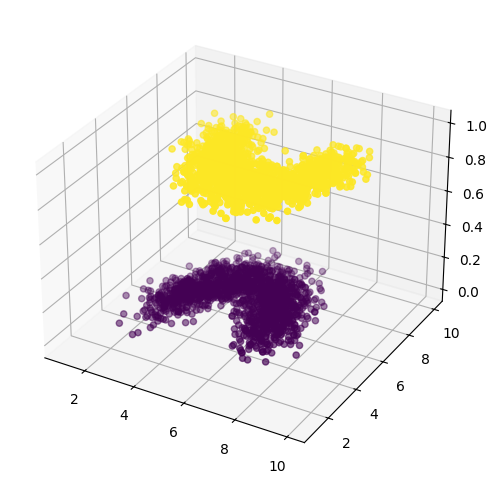

In [24]:
%matplotlib inline
#%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

### Train|Test Split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling Data

Veri kümesine ve probleme özgü olarak, deneyerek en uygun scale yöntemini belirlemek faydalı olacaktır.


Verilerin Ölçeği: Featurelerin değer aralıkları önemlidir. Özellikler arasında büyük değer farklılıkları varsa, Min-Max Ölçeklendirme kullanmak uygun olabilir. Ancak, değerler arasında büyük bir ölçek farkı yoksa, Z-Skor Ölçeklendirme (Standartlaştırma) daha uygun olabilir.
Örnek:

Özellik 1: 0 ile 100 arasında değerler alır.
Özellik 2: -1 ile 1 arasında değerler alır.
Bu durumda, Z-Skor Ölçeklendirme daha uygun olabilir, çünkü Min-Max Ölçeklendirme, özellik 1'in ölçeğini daraltarak veri kaybına neden olabilir.

Dağılım ve Aykırı Değerler: Eğer veriler normal bir dağılıma sahipse ve aykırı değerler azsa, Z-Skor Ölçeklendirme (StandardScaler) uygun olabilir. Ancak, verilerin dağılımı dengesiz veya aykırı değerler çok fazlaysa, Min-Max (MinmaxScaler) Ölçeklendirme bu duruma daha iyi uyabilir.

Kategorik Veriler: Eğer verilerde kategorik özellikler varsa ve sıralama aralığı yoksa, Min-Max (MinmaxScaler) Ölçeklendirme kullanmak anlamlı olmayabilir.

Model Bağımlılığı: Kullanılacak modelin ölçeklendirmeye duyarlılığı da dikkate alınmalıdır. Örneğin, **KNN gibi bir model**, uzaklık hesaplamalarına dayandığından, özelliklerin ölçeklendirilmesi bu modele önemli ölçüde etki eder.

Hiperparametre Ayarlaması: Bazı makine öğrenme algoritmaları, özelliklerin ölçeklendirilmesine bağlı olarak farklı hiperparametre değerlerine ihtiyaç duyabilir. Bu durumda, farklı ölçeklendirme yöntemlerini deneyerek en iyi sonuçları elde etmek mümkün olabilir.

Sonuç olarak, hangi ölçeklendirme yönteminin kullanılacağı veri kümesinin **doğasına, özelliklerin dağılımına, kullanılacak modelin özelliklerine ve hiperparametre ayarlamalarına** bağlıdır.

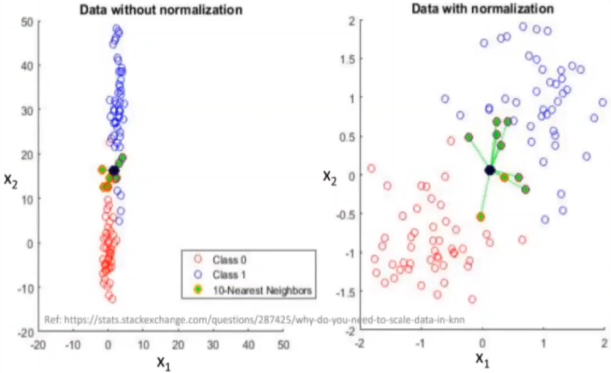

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [30]:
from sklearn.neighbors import KNeighborsClassifier

## Modellling

### K-En Yakın Komşu (KNN) Algoritmasının Parametreleri

KNN algoritması, bir dizi parametre ile yapılandırılabilir. Bu parametreler, modelin performansını ve doğruluğunu etkileyebilir.

#### Parametrelerin Açıklamaları

1. **n_neighbors**: 
   - K komşuların sayısı.
   - Yeni bir veri noktasını sınıflandırmak veya tahmin etmek için kullanılacak komşu sayısını belirler.
   - Uygun bir değerle ayarlamak, modelin başarısını etkileyebilir.
   - Genellikle tek ve küçük bir değer tercih edilir.

2. **weights**:
   - Komşuların katkısını belirleyen ağırlıklandırma yöntemi.
   - `"uniform"`: Her komşunun eşit ağırlıkta olması.
   - `"distance"`: Komşuların uzaklıklarına göre ağırlıklandırılması.

3. **algorithm**:
   - Komşuların aranma yöntemini belirler.
   - Seçenekler: `"auto"`, `"ball_tree"`, `"kd_tree"`, `"brute"`.
   - `"auto"`: Veri setine göre en uygun algoritmayı otomatik seçer.
   - `"ball_tree"` ve `"kd_tree"`: Hızlı komşu arama için.
   - `"brute"`: Tüm veri noktalarını karşılaştırarak arama yapar.

4. **leaf_size**:
   - `"ball_tree"` veya `"kd_tree"` algoritmalarında yaprak düğümlerinin boyutunu belirler.
   - Daha büyük yaprak boyutu, hafızada daha az yer tutabilir, ancak arama yavaş olabilir.

5. **p**:
   - Uzaklık metriğinin türünü belirler.
   - `p = 1`: Manhattan uzaklığı.
   - `p = 2`: Euclidean uzaklığı.

6. **metric**:
   - Uzaklık metriğini tanımlar.
   - Varsayılan olarak `"minkowski"`, `p` parametresine bağlı olarak Manhattan veya Euclidean uzaklığını temsil eder.
   - Diğer seçenekler: `"manhattan"`, `"euclidean"`, `"cosine"` vb.

7. **metric_params**:
   - Uzaklık metriği için ekstra parametreler sağlar.

8. **n_jobs**:
   - Komşu arama işlemini paralel yapmak için kullanılır.
   - `n_jobs = -1`: Tüm işlemci çekirdeklerini kullanır.

Bu parametrelerin doğru ayarlanması, KNN modelinin performansını ve doğruluğunu önemli ölçüde etkileyebilir.


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [34]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [35]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [36]:
import mglearn

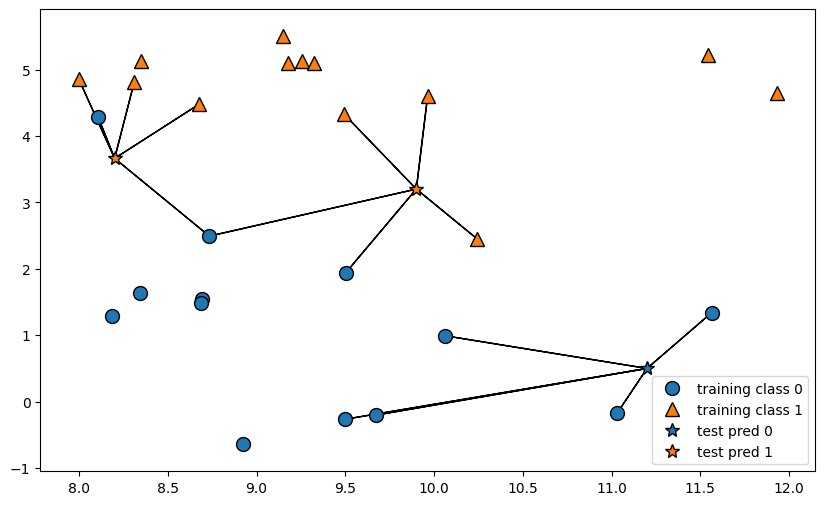

In [37]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)

In [38]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [39]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2236,0,0,0.2,0.8
1089,0,0,0.0,1.0
1509,1,1,1.0,0.0
1551,0,0,0.0,1.0
76,1,1,0.8,0.2
1055,1,1,1.0,0.0
2758,1,1,1.0,0.0
2793,0,0,0.0,1.0
2552,1,1,1.0,0.0
2994,1,1,1.0,0.0


## Model Perfomance on Classification Task

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [41]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

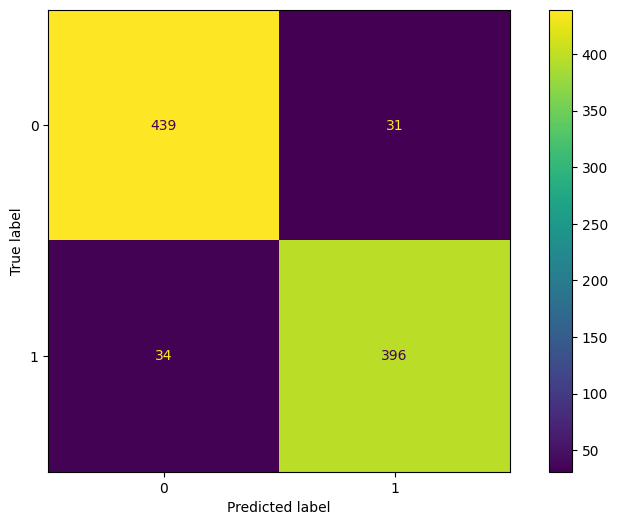

In [42]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test);

**stratfy = y ile alınan sonuç**

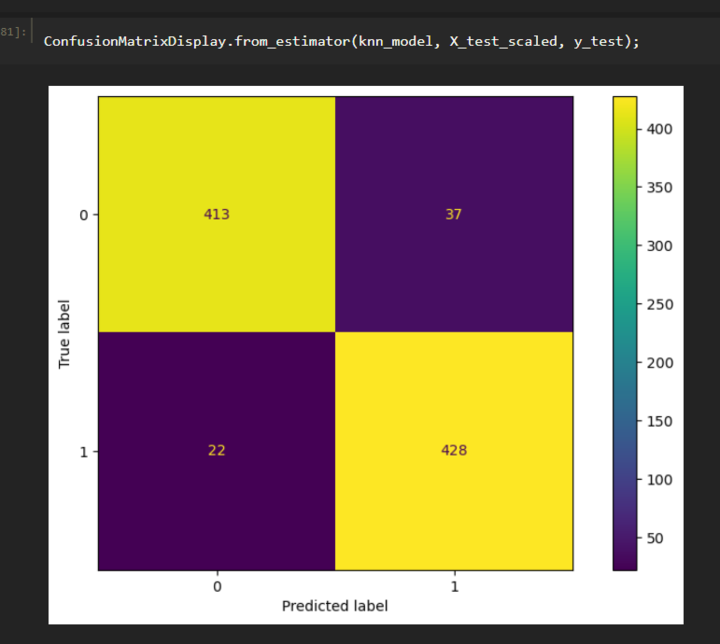

In [43]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values

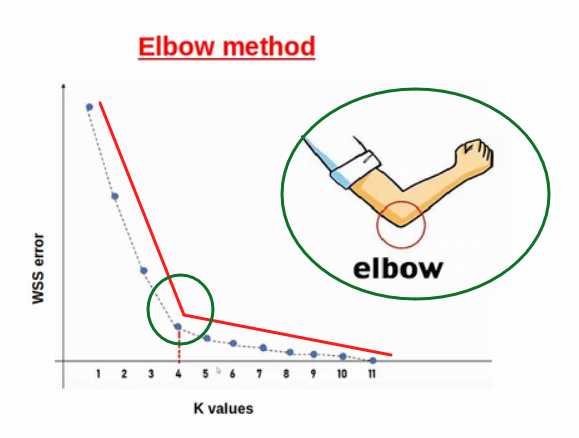

In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [45]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

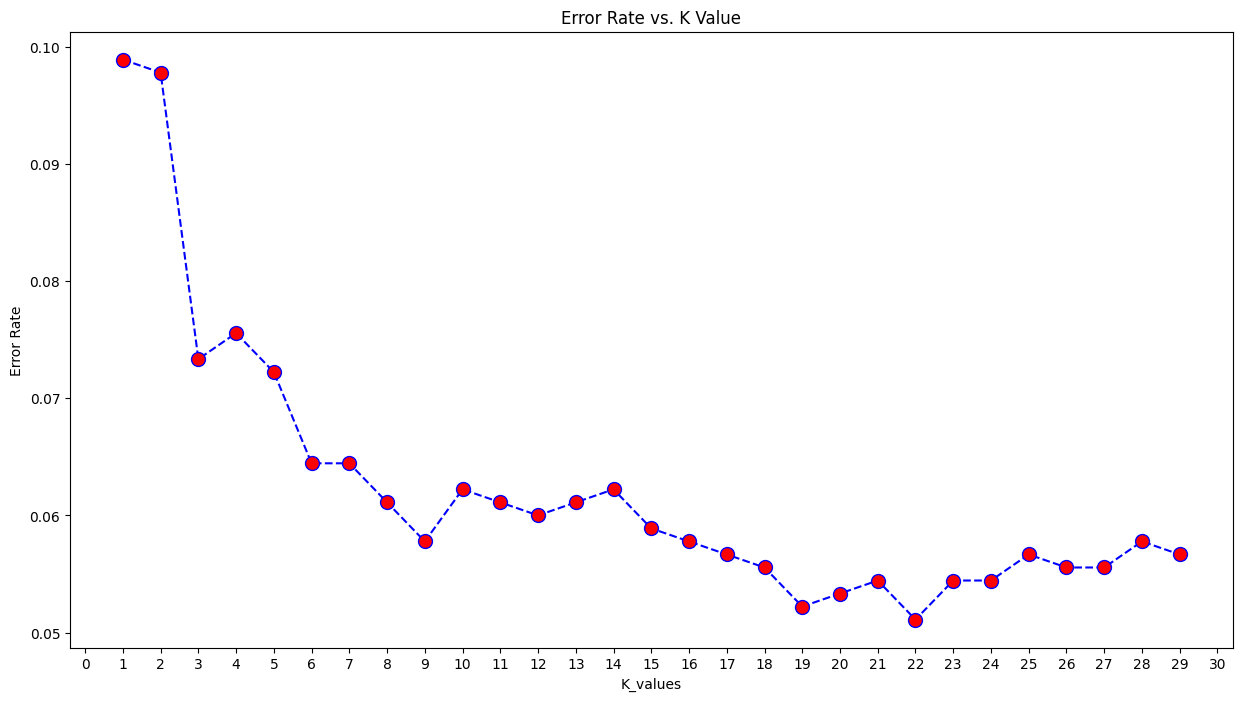

In [46]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

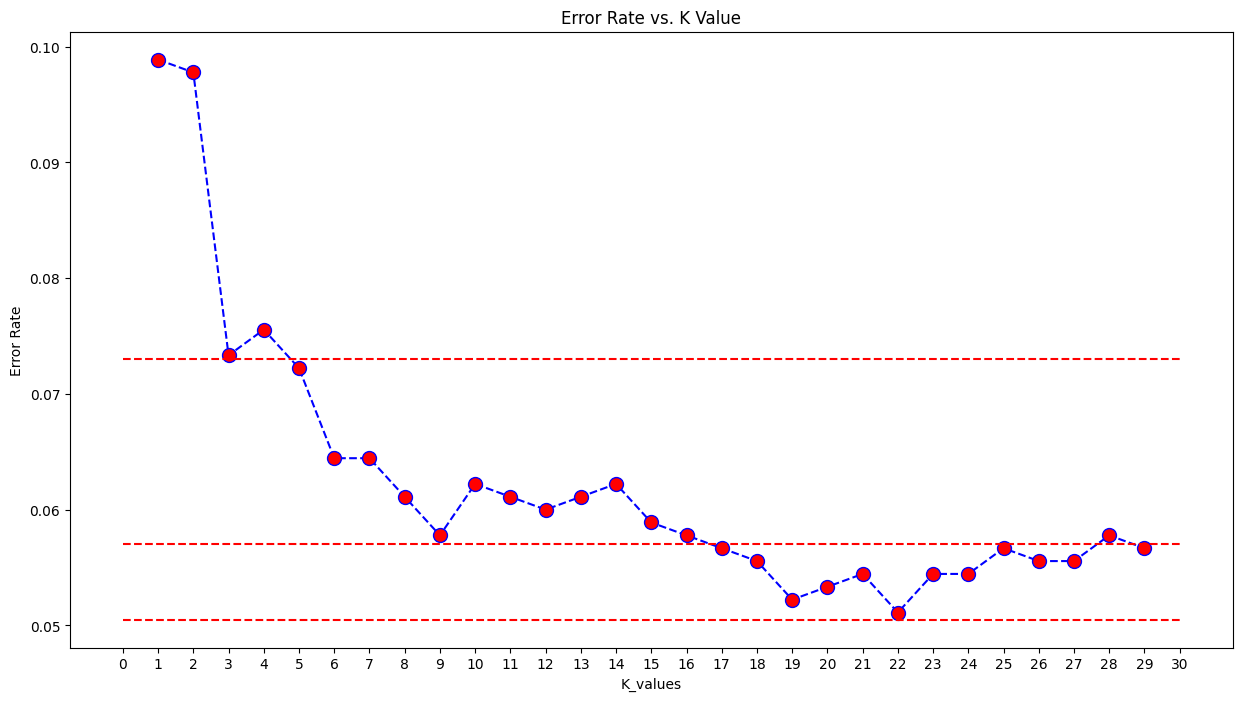

In [47]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.073, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0505, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

plt.xticks(range(0, 31, 1));

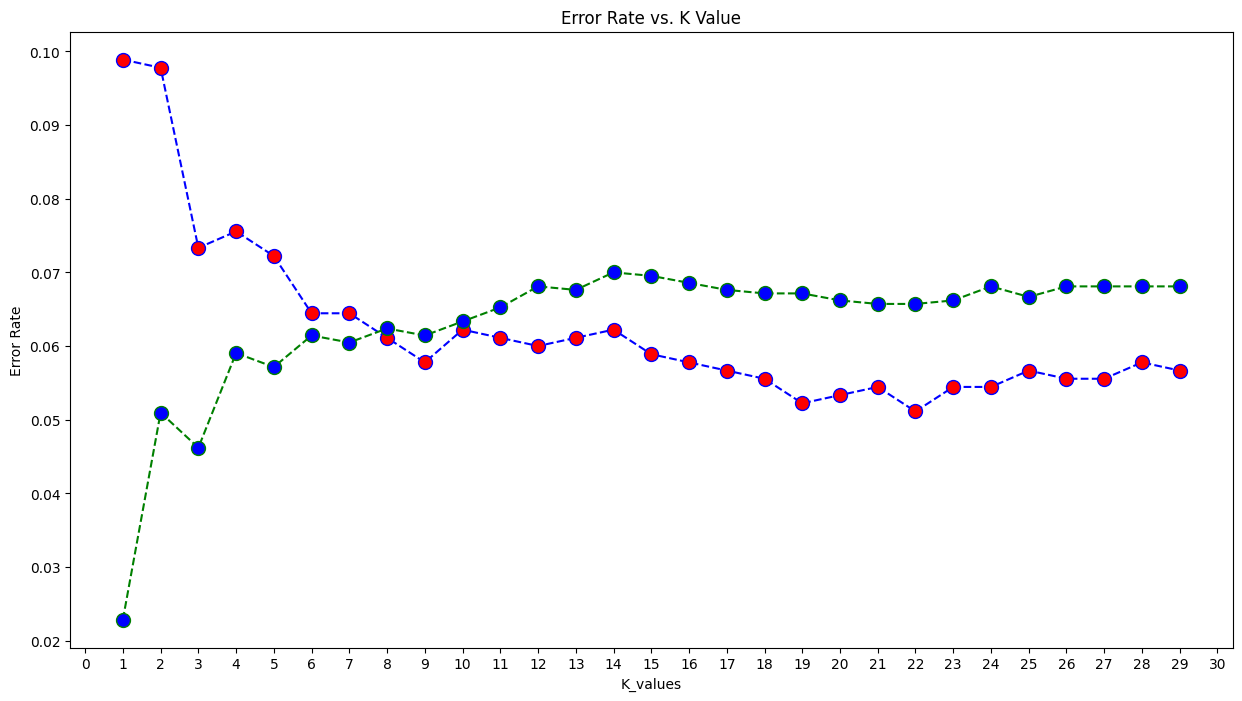

In [48]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.xticks(range(0, 31, 1));

## Scores by Various K Values

In [49]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)
print("WITH K=1\n")

eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1



Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [51]:
k_list = [3, 6, 9, 16, 21, 22, 23]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled,y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)
    print("______________________________________________________")

WITH K=3



Test_Set

[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set

[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

______________________________________________________
WITH K=6

Test_Set

[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy

## Cross Validate For Optimal K Value

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate

In [53]:
model = KNeighborsClassifier(n_neighbors= 21)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv=10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.006994,0.086999,0.933333,0.942857,0.925234,0.933962
2,0.007987,0.081003,0.957143,0.945455,0.971963,0.958525
3,0.009004,0.077995,0.952381,0.970874,0.934579,0.952381
4,0.009000,0.093992,0.866667,0.855856,0.887850,0.871560
5,0.001999,0.036999,0.947619,0.944444,0.953271,0.948837
6,0.003000,0.043004,0.914286,0.908257,0.925234,0.916667
7,0.004001,0.040002,0.933333,0.926606,0.943925,0.935185
8,0.006001,0.035995,0.938095,0.935185,0.943925,0.939535
9,0.005003,0.043994,0.952381,0.980198,0.925234,0.951923
10,0.003002,0.041005,0.909524,0.885965,0.943925,0.914027


In [54]:
df_scores.mean()[2:]

test_accuracy     0.930476
test_precision    0.929570
test_recall       0.935514
test_f1           0.932260
dtype: float64

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [56]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

## Predict New Observation

**Scale işlemi çok ÖNEMLİ aksi halde tam tersi sonuçlar alabiliriz.**

In [57]:
new_observation = [[3.5, 4.3]]

In [58]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [59]:
knn_model.predict_proba(new_observation)

array([[0.22222222, 0.77777778]])

In [60]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [61]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [62]:
knn_model.predict_proba(new_observation_scaled)

array([[0.66666667, 0.33333333]])

## Gridsearch Method for Chosing Reasonable K Value

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
knn_grid = KNeighborsClassifier()

In [65]:
n_neighbors = range(1, 30) # k_values

In [66]:
param_grid = {"n_neighbors":n_neighbors, "p": [1, 2], "weights": ["uniform", "distance"]}

In [67]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = "recall")

In [68]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [69]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

Evaluation ROC and AUC

In [71]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=21).fit(X_train_scaled, y_train)

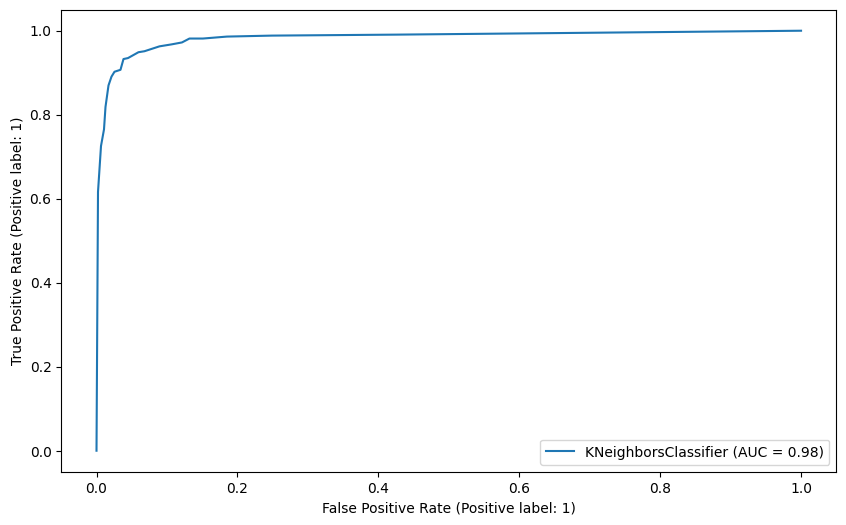

In [73]:
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [76]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9826669965363682

Final Model  and Deployment

# Pipeline
### Machine Learning'de Pipeline Kullanımı
Machine Learning'de "pipeline", veri işleme ve modelleme adımlarını birleştirerek, veri ön işlemeden son model tahminine kadar olan süreci otomatize etmeyi sağlar.
#### Pipeline Kullanımı
- **Ne Zaman Kullanılır?**: Veri ön işleme, özellik dönüştürme ve model tahmini adımlarını bir arada ve otomatize etmek için kullanılır.
#### İşlem Adımları (Transformers)
- Bu adımlar, veriyi temizlemek, özellikleri dönüştürmek veya özellik seçimi gibi işlemleri içerir.
- Ön işlem adımları, veri kümesinin özelliklerini hazırlamak ve düzenlemek için kullanılır.
- Örnekler: Ölçeklendirme (scaling), kodlama (encoding), Ana Bileşen Analizi (PCA).
- Genellikle `fit_transform` metodunu kullanarak gerçekleştirilir.
#### Model (Estimator)
- Bu adım, veri üzerinde bir makine öğrenmesi modelini kurmak ve eğitmek için kullanılır.
- Sınıflandırma, regresyon gibi çeşitli problemler için kullanılan modeller bu adımda yer alır.
- Çeşitli öğrenme algoritmaları ve modeller bu aşamada entegre edilir.
### Tipik Bir Veri Ön İşleme Sıralaması Örneği
Veri ön işleme adımlarının sırası genellikle önemlidir ve belirli işlemlerin diğerlerinden önce yapılmasının nedenleri vardır. İşte bazı genel kurallar ve öneriler:
* **Eksik Değerlerin Doldurulması (Imputation):** Genellikle diğer ön işleme adımlarından önce yapılmalıdır. Eksik verilerin doldurulması, diğer ön işleme adımlarının (örneğin ölçeklendirme veya kodlama) doğru çalışabilmesi için önemlidir, çünkü bu adımlar genellikle eksik değerlerle uyumlu değildir.
* **Ölçeklendirme (Scaling):** Kategorik verilerin kodlanmasından önce yapılması genellikle daha iyidir. Ölçeklendirme, sayısal verilerin birbirleriyle uyumlu olmasını sağlar ve KNN veya SVM gibi mesafe temelli algoritmalar için önemlidir. Ancak, one-hot encoding gibi işlemlerden sonra ölçeklendirme yapmak, ölçeklendirme işleminin anlamını kaybettirebilir, çünkü kodlanmış kategorik veriler genellikle zaten 0 ve 1 arasında değerler alır.
* **Kategorik Verilerin Kodlanması (Encoding):** Özellikle one-hot encoding kullanılıyorsa, eksik değerlerin doldurulmasından ve sayısal verilerin ölçeklendirilmesinden sonra yapılmalıdır. Kategorik verilerin doğru bir şekilde sayısal formata dönüştürülmesi, modelin bu verileri anlamasını sağlar.
* **Boyut İndirgeme (Dimensionality Reduction):** Özellikle PCA gibi yöntemler kullanılıyorsa, verilerin ölçeklendirilmesinden sonra yapılmalıdır. Boyut indirgeme yöntemleri, özellikler arasındaki varyansı dikkate alarak çalışır ve ölçeklendirilmemiş veriler, yanıltıcı sonuçlara yol açabilir.
* **Özellik Seçimi (Feature Selection):** Genellikle veri ön işlemesi tamamlandıktan sonra yapılır. Özellik seçimi, modelin eğitilmesi sırasında kullanılacak en önemli özellikleri belirlemek için kullanılır ve veri setindeki gürültüyü azaltabilir.
### İşte tipik bir veri ön işleme sıralaması örneği:
1) Eksik Değerlerin Doldurulması
2) Sayısal Verilerin Ölçeklendirilmesi (Scaling)
3) Kategorik Verilerin Kodlanması
4) Boyut İndirgeme
5) Özellik Seçimi
- Her adım, sonraki adım için verileri uygun bir formata getirir, bu yüzden sıralama önemlidir.
- Ancak, her veri seti ve problem özeldir, bu yüzden en iyi ön işleme akışını belirlemek için verilerinizin doğasını ve seçtiğiniz modelin gereksinimlerini dikkate almalısınız.

## Örnek Pipe Line<br>
from sklearn.pipeline import Pipeline<br>
from sklearn.impute import SimpleImputer<br>
from sklearn.preprocessing import StandardScaler, OneHotEncoder<br>
from sklearn.decomposition import PCA<br>
from sklearn.feature_selection import SelectKBest, chi2<br>
from sklearn.ensemble import RandomForestClassifier<br>
### Pipeline için adımlar listesi
steps = [
 *    ('imputer', SimpleImputer(strategy='mean')), # Eksik değerleri doldurma
 *    ('scaler', StandardScaler()), # Özellik ölçeklendirme
 *    ('encoder', OneHotEncoder()), # Kategorik değişkenleri kodlama
 *    ('pca', PCA(n_components=2)), # Boyut indirgeme
 *    ('feature_selection', SelectKBest(chi2, k=10)), # En iyi 10 özelliği seçme
 *    ('classifier', RandomForestClassifier()) # Sınıflandırma modeli
]
### Pipeline nesnesi oluşturma
pipeline = Pipeline(steps=steps)

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [82]:
steps = [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

In [83]:
Pipeline(steps=steps)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [84]:
pipe_model = Pipeline(steps=steps)

In [86]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [87]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [88]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

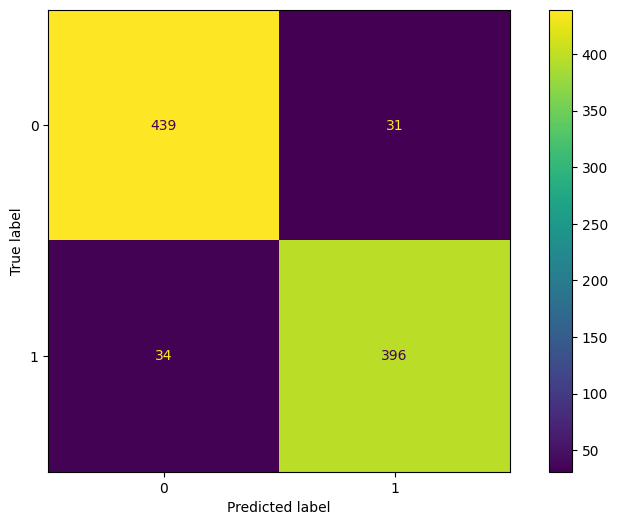

In [90]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [93]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}